In this notebook, we write the code for kmeans. By doing this we will have a better understanding of it.
# Data
Here we use the digit dataset from sklearn. In order to plot it, we also reduce the demensionality from 64 to 2.

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = load_digits()

In [3]:
digits.data.shape

(1797, 64)

Let explore the dataset by plot the numbers

<Figure size 432x288 with 0 Axes>

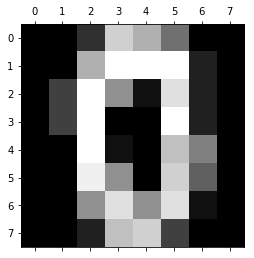

In [4]:
plt.gray() 
plt.matshow(digits.images[20]) 
plt.show()

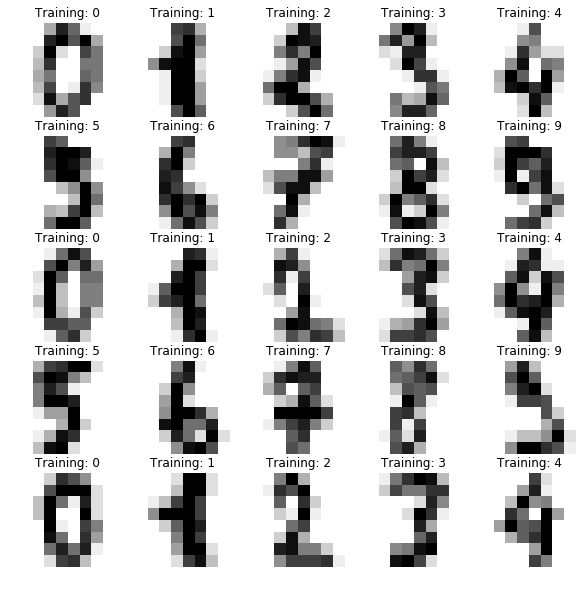

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(10,10))
for index, (image, label) in enumerate(images_and_labels[:25]):
    plt.subplot(5, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title('Training: %i' % label)

Demensionality reduction by PCA

In [6]:
data = scale(digits.data)
pca = PCA(n_components=2).fit(data)
points = PCA(n_components=2).fit_transform(data)

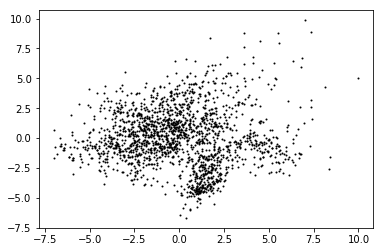

In [7]:
plt.plot(points[:, 0], points[:, 1], 'k.', markersize=2)

# Algorithm

Firstly, we need to initilize the centroids with random values.

In [8]:
def init_centroids(k, n_features):
    return np.random.random(k * n_features).reshape((k, n_features))

Here we use euclidean distance to calcuate the similarity between two points.

In [9]:
def distance(pointA, pointB):
    return np.sqrt((pointA[0]-pointB[0])**2+(pointA[1]-pointB[1])**2)

Assign each point to a centroid according to the distance.

In [10]:


def belongs2(point, centroids):
    index = 0
    min_distance = np.inf
    for i in range(len(centroids)):
        d = distance(point, centroids[i])
        if d<min_distance:
            min_distance=d
            index=i
    return index

def update_index(points, centroids):
    n_samples = len(points)
    new_indeces = np.zeros((n_samples))
    for i, point in enumerate(points):
        new_indeces[i] = belongs2(point, centroids)
    new_indeces = new_indeces.astype(int)
    return new_indeces

Update centroids by points.

In [11]:
def update_centroids(points, centroid_index):
    k = max(centroid_index)+1
    new_centroids = np.zeros((10,2))
    for i in range(k):
        new_centroids[i]=points[centroid_index==i].mean(axis=0)
    return new_centroids

In [12]:
def my_kmeans(points):
    centroids = init_centroids(10, 2)
    indeces=update_index(points, centroids)
    old_indeces = indeces
    for i in range(1000):
        centroids=update_centroids(points, indeces)
        indeces=update_index(points, centroids)
        if np.array_equal(indeces, old_indeces):
            print('converge', i)
            break
        else:
            old_indeces=indeces
    return centroids, indeces
    

# Test the Algorithm
The following code may fail and produce nan, you can simply rerun it.

In [13]:
centroids, indeces=my_kmeans(points)
centroids

converge 15


array([[-4.58959238, -0.8432033 ],
       [ 1.71636211, -1.47923651],
       [ 4.95071736, -0.68965574],
       [ 1.21000187, -3.93779568],
       [ 1.95884528,  1.52057292],
       [ 3.8878771 ,  5.31429289],
       [-1.91174901, -1.37051631],
       [-0.01205497,  3.52017988],
       [-0.44401107,  0.58105961],
       [-2.71000273,  1.69218605]])

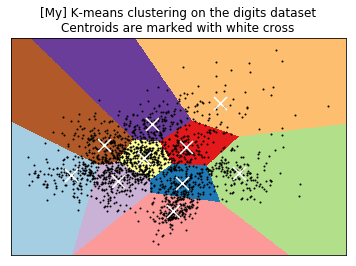

In [14]:
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
all_points = np.c_[xx.ravel(), yy.ravel()]
Z = update_index(all_points, centroids)

Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(points[:, 0], points[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X

plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('[My] K-means clustering on the digits dataset\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Sklearn

In [15]:
from sklearn.cluster import KMeans
n_digits = 10
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(points)
centroids = kmeans.cluster_centers_

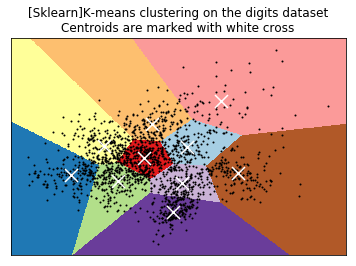

In [16]:
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(points[:, 0], points[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X

plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('[Sklearn]K-means clustering on the digits dataset\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()